In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder#for encoding
from sklearn.model_selection import train_test_split#for train test splitting
from sklearn.tree import DecisionTreeClassifier#for decision tree object
from sklearn.metrics import classification_report, confusion_matrix#for checking testing results
from sklearn.tree import plot_tree#for visualizing tree 
import matplotlib.pyplot as plt

In [2]:
# Read dataset
data = pd.read_csv("Company_Data.csv")

In [3]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
#getting information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
data.describe

<bound method NDFrame.describe of      Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     

In [6]:
data.shape

(400, 11)

In [7]:
data.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [8]:
#Creating dummy vairables dropping first dummy variable
data=pd.get_dummies(data,columns=['Urban','US'], drop_first=True)

In [9]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,1,1
396,6.14,139,23,3,37,120,Medium,55,11,0,1
397,7.41,162,26,12,368,159,Medium,40,18,1,1
398,5.94,100,79,7,284,95,Bad,50,12,1,1


In [10]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [11]:
data['ShelveLoc']=data['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})

In [12]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,3,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,3,38,13,1,0


In [13]:
x=data.iloc[:,0:6]
y=data['ShelveLoc']

In [14]:
x

,Sales,CompPrice,Income,Advertising,Population,Price
0,9.50,138,73,11,276,120
1,11.22,111,48,16,260,83
2,10.06,113,35,10,269,80
3,7.40,117,100,4,466,97
4,4.15,141,64,3,340,128
...,...,...,...,...,...,...
395,12.57,138,108,17,203,128
396,6.14,139,23,3,37,120
397,7.41,162,26,12,368,159
398,5.94,100,79,7,284,95


In [15]:
y

0      3
1      1
2      2
3      2
4      3
      ..
395    1
396    2
397    2
398    3
399    1
Name: ShelveLoc, Length: 400, dtype: int64

In [16]:
data.ShelveLoc.value_counts()

2    219
3     96
1     85
Name: ShelveLoc, dtype: int64

In [17]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=32)

## Building Decision Tree Classifier using Entropy Criteria

In [18]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [19]:
from sklearn import tree

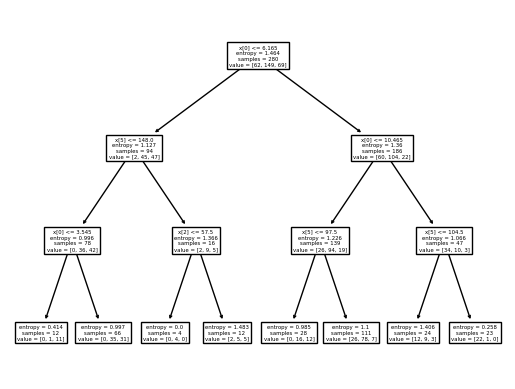

In [20]:
#PLot the decision tree
tree.plot_tree(model);

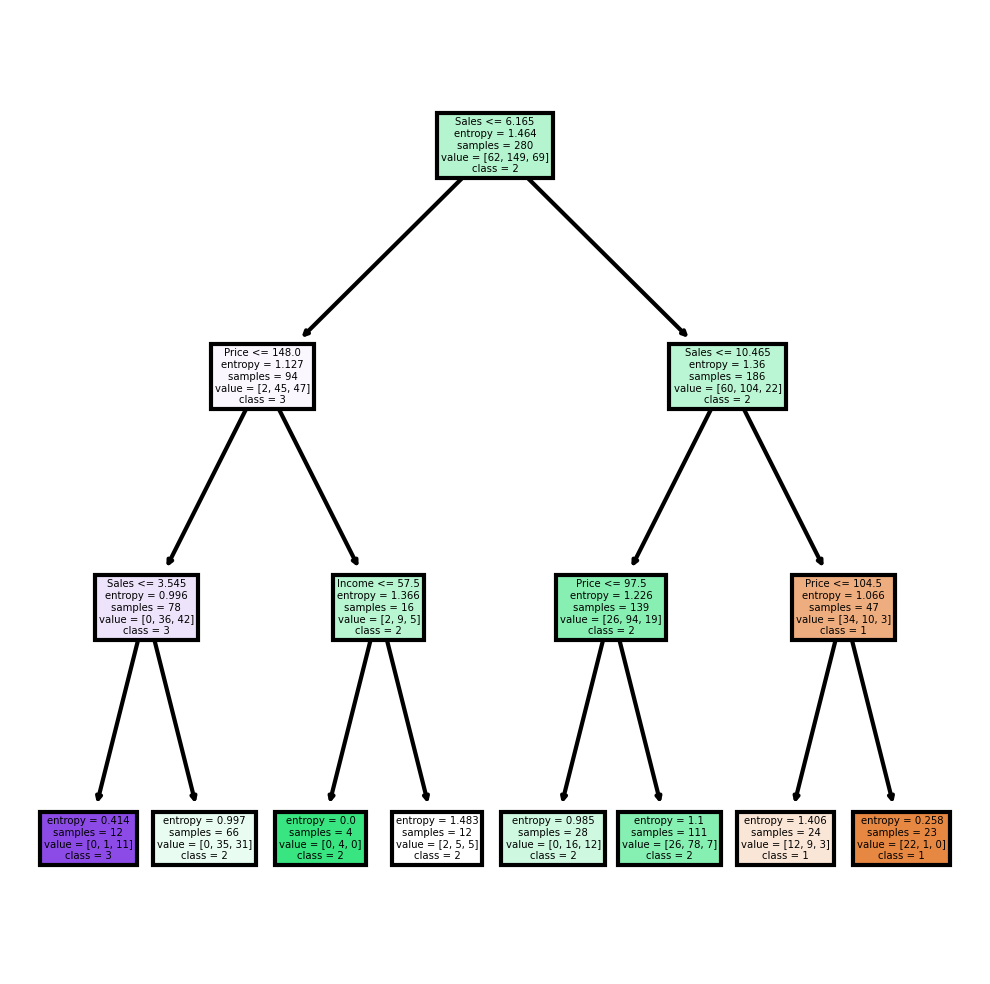

In [21]:
import matplotlib.pyplot as plt
fn=['Sales','CompPrice','Income','Advertising','Population','Price']
cn=['1', '2', '3']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [22]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category

2    97
1    16
3     7
dtype: int64

In [23]:
preds

array([3, 2, 2, 2, 2, 2, 2, 2, 1, 2, 3, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 3, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 1, 2], dtype=int64)

In [24]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,1,2,3
ShelveLoc,,,
1,10,13,0
2,6,61,3
3,0,23,4


In [25]:
# Accuracy 
import numpy as np
np.mean(preds==y_test)

0.625

## Building Decision Tree Classifier (CART) using Gini Criteria

In [26]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [27]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [28]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.625